In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [3]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [4]:
# get file from disk
filename = 'final_comments_df.csv'
final_comments_df=pd.read_csv(filename)

In [5]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,angelinaho3925,2019-07-29T00:53:46Z,2019-07-29T00:53:46Z,4637,Bro if I got this app it would have zero peopl...
1,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,howlymoly914,2019-07-29T00:23:17Z,2019-07-29T00:23:17Z,2155,All I can say is *Finally*\nKim so hyun is her...
2,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,clairerominez1318,2019-08-01T11:22:44Z,2019-08-01T11:22:44Z,378,Another highschool drama with Kim So Hyun! \n\...
3,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,panitia_rimaajengnurraihan9346,2019-07-29T00:41:51Z,2019-07-29T00:41:51Z,1527,I really miss her acting. The trailer look goo...
4,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,keanna2060,2019-07-29T10:52:00Z,2019-07-29T10:52:54Z,319,Finally! Kim So Hyun is back with a school-ro...
...,...,...,...,...,...,...,...,...,...,...,...,...
4300,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,yoshhikko6735,2021-03-26T10:58:55Z,2021-03-26T10:58:55Z,1,WHY DOES EVERYONE LIKES SUN OH FOR KIM JOJO HA...
4301,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,ZahraDias,2021-03-20T07:18:07Z,2021-03-20T07:18:07Z,1,i dont understand why people like sun oh so mu...
4302,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,seojun8209,2021-03-20T06:57:54Z,2021-03-20T06:57:54Z,8,Y'all have no right to complain about the endg...
4303,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,rose-gl4io,2021-03-23T01:20:46Z,2021-03-23T01:24:11Z,2,To anyone who hasn't watched this already\n\n*...


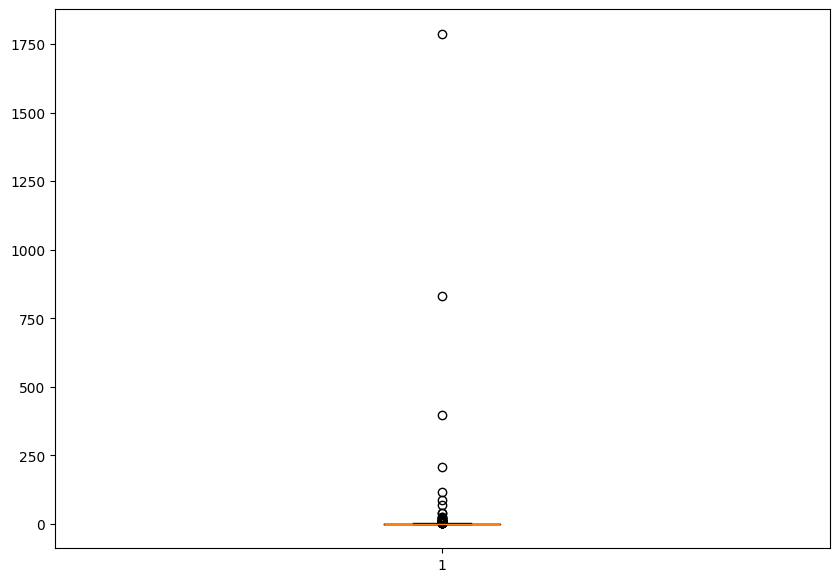

In [6]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [7]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,2299
1,Love Alarm Season 2,2006


In [8]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] > like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,angelinaho3925,2019-07-29T00:53:46Z,2019-07-29T00:53:46Z,4637,Bro if I got this app it would have zero peopl...
1,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,howlymoly914,2019-07-29T00:23:17Z,2019-07-29T00:23:17Z,2155,All I can say is *Finally*\nKim so hyun is her...
2,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,clairerominez1318,2019-08-01T11:22:44Z,2019-08-01T11:22:44Z,378,Another highschool drama with Kim So Hyun! \n\...
3,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,panitia_rimaajengnurraihan9346,2019-07-29T00:41:51Z,2019-07-29T00:41:51Z,1527,I really miss her acting. The trailer look goo...
4,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,keanna2060,2019-07-29T10:52:00Z,2019-07-29T10:52:54Z,319,Finally! Kim So Hyun is back with a school-ro...
...,...,...,...,...,...,...,...,...,...,...,...,...
4291,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,jothshanaroy8579,2022-04-02T12:46:11Z,2022-04-02T12:46:11Z,2,I hate this second season more than any other ...
4294,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,lanphuongpham3259,2021-03-27T18:27:03Z,2021-03-27T18:27:03Z,4,I actually liked the ending? Why is everyone s...
4302,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,seojun8209,2021-03-20T06:57:54Z,2021-03-20T06:57:54Z,8,Y'all have no right to complain about the endg...
4303,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,rose-gl4io,2021-03-23T01:20:46Z,2021-03-23T01:24:11Z,2,To anyone who hasn't watched this already\n\n*...


In [9]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,756
1,Love Alarm Season 2,931


In [10]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,Love Alarm Review | NETFLIX | Love Alarm Seaso...,41
1,Love Alarm Season 2 ENDING EXPLAINED || Netfli...,161
2,Love Alarm Season 2 Review Netflix Original Se...,21
3,Love Alarm Season 2 | Official Trailer | Netfl...,660
4,Love Alarm | Official Teaser | Netflix [ENG SUB],277
5,Love Alarm | Official Trailer | Netflix,445
6,Love Alarm | Teaser | Netflix,34
7,Sun-Oh or Hye-young? Was Love Alarm Season 2 E...,48


In [11]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

C:\Users\ishaq\AppData\Local\Temp\ipykernel_4104\2144388512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)


,v_title,c_text,c_author,c_blob_sentiment
2379,Love Alarm Season 2 ENDING EXPLAINED || Netfli...,I litterly can’t stop crying.I can’t believe i...,btsblackpink2743,-1.0
4227,Love Alarm Season 2 | Official Trailer | Netfl...,Terrible ending,toimeiwong5035,-1.0
4056,Love Alarm Season 2 | Official Trailer | Netfl...,Worst Ending!!!,wengdagno9078,-1.0
2752,Love Alarm Review | NETFLIX | Love Alarm Seaso...,The worst ending,TanviSathe-on2bl,-1.0
2383,Love Alarm Season 2 ENDING EXPLAINED || Netfli...,Spoiler: *worst drama ever.*,Clairemathers,-1.0
...,...,...,...,...
1514,Love Alarm | Official Trailer | Netflix,yall its happening LOVE ALARM SEASON 2 IS COMI...,Harpreetl,1.0
3268,Love Alarm Season 2 | Official Trailer | Netfl...,Maturity is when you realise this is the perfe...,shwetashalini4989,1.0
1647,Love Alarm | Official Trailer | Netflix,Kim JoJoHwang SunOh\n\n\nlet's give them a hap...,minksoo4523,1.0
3066,Love Alarm Season 2 | Official Trailer | Netfl...,We need So Hyun and Song Kang in another drama...,lovetata9018,1.0


Im not sure if even mapping is the correct choice but ill go with this for now

In [12]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_4104\194784812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)


c_sentiment
positive    808
neutral     519
negative    360
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                     'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                     'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                     'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                     'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel','game','song',
                     'season', 'trailer', 'casting', 'fanbase', 'recommendation','goblin',
                     'viewer', 'critic', 'Korean', 'entertainment','watched' ,'guardian',
                     'show','show','squid','watch','watching','acting','netflix','show',
                     'jojo','kim','hye','sun','yeong','end','start','like','oh','someone'
                     ,'people','girl','boy','man','women','woman'
                     ]


In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [16]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    # TfidfVectorizer(preprocessor=preprocess_text, norm='l2',ngram_range=(1, 3), sublinear_tf=True)
    CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.62      0.69        73
     neutral       0.76      0.86      0.81       111
    positive       0.81      0.81      0.81       154

    accuracy                           0.79       338
   macro avg       0.79      0.76      0.77       338
weighted avg       0.79      0.79      0.78       338



In [17]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

parameters = {
    'vectorizer': [TfidfVectorizer(),CountVectorizer()],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__preprocessor':[preprocess_text],
    'vectorizer__encoding':['utf-8'],
    'vectorizer__max_df': [0.6, 0.9],
    'vectorizer__min_df': [3],
    # 'vectorizer__max_features': [1,2,3],
    # 'vectorizer__norm': ['l1', 'l2'],
    # 'vectorizer__smooth_idf': [False,True],
    'vectorizer__binary':[False,True],
    'vectorizer__lowercase':[False,True],
    # 'vectorizer__sublinear_tf': [True, False],
    # 'vectorizer__use_idf': [True, False],
    'classifier': [
                    MultinomialNB(),
                   SVC(),
                   LogisticRegression(),
                   RandomForestClassifier()
                   ],
}

grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Best Parameters:  {'classifier': RandomForestClassifier(), 'vectorizer': TfidfVectorizer(), 'vectorizer__binary': False, 'vectorizer__encoding': 'utf-8', 'vectorizer__lowercase': True, 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1), 'vectorizer__preprocessor': <function preprocess_text at 0x000001749002CDC0>}
              precision    recall  f1-score   support

    negative       0.88      0.58      0.69        73
     neutral       0.80      0.86      0.83       111
    positive       0.80      0.88      0.84       154

    accuracy                           0.81       338
   macro avg       0.83      0.77      0.79       338
weighted avg       0.82      0.81      0.81       338



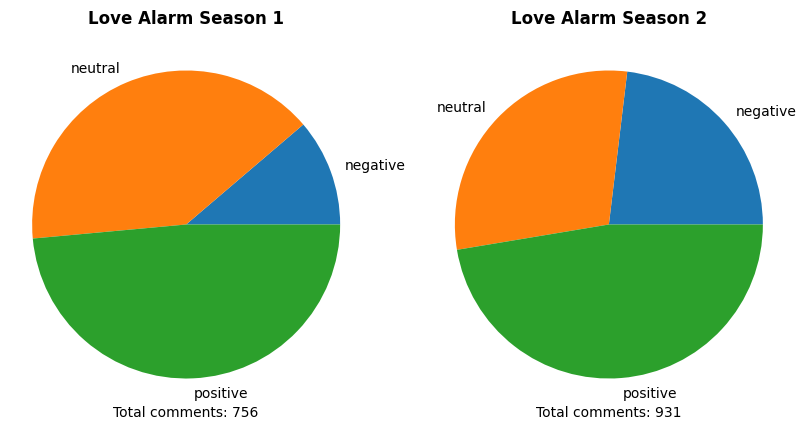

In [18]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\Users\\ishaq\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


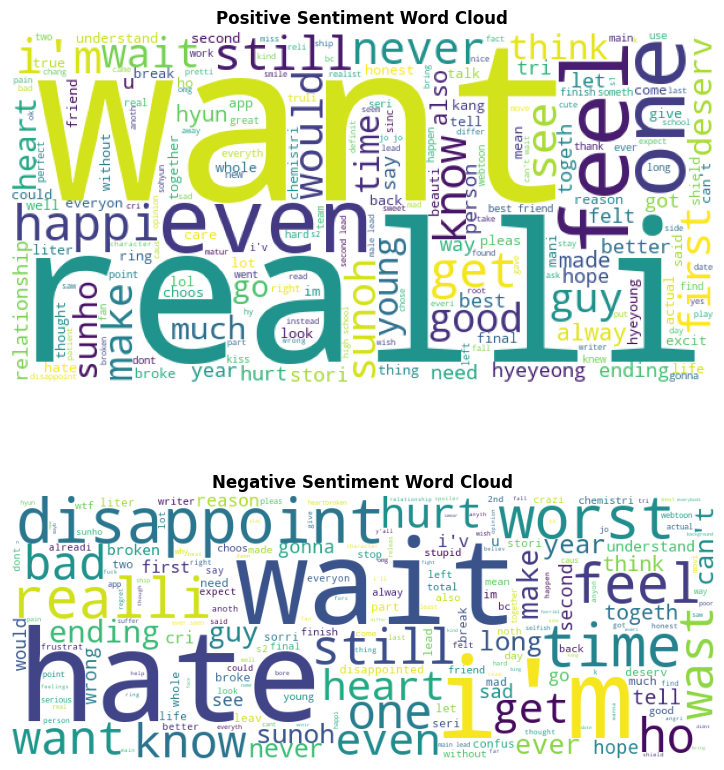

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed).generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed).generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(2, 2, 1)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 